## Observations and Insights 

Capomulin & Ramicane tested more mice than the other drug regimens and have the lowest average & median tumor volume.
Capomulin showed good results in reducing tumor volume - see chart on Mouse ID m601.
Weight is a negative factor related to Tumor Volume shrinking.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_original=pd.merge(mouse_metadata_df, study_results_df, how="left")
# Display the data table for preview
df_original.head()
df_original

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
unique_mice = df_original['Mouse ID'].unique()
print(len(unique_mice))

249


In [4]:
print(df_original.isnull().sum())

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64


In [5]:
# Drop any duplicate rows
sorted_df=df_original.sort_values(['Mouse ID', 'Timepoint'])
sorted_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
duplicates = sorted_df[sorted_df.duplicated()]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [7]:
check = df_original[df_original["Mouse ID"]=='g989']
check

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
df = df_original.drop(df_original.index[[908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920]])
check2 = df[df['Mouse ID']=='g989']
check2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [9]:
# Recheck the number of mice
print(len(df['Mouse ID'].unique()))

248


In [10]:
df.reset_index(drop=True, inplace=True)
df.tail()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4
1879,z969,Naftisol,Male,9,30,45,73.867845,4


In [12]:
df_drug = df.groupby("Drug Regimen")
df_drug["Tumor Volume (mm3)"].mean()
df_drug["Timepoint"].count()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
tumor_volume = df.groupby("Drug Regimen")
summary_stats = tumor_volume["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, st.sem])
summary_stats = summary_stats.rename(columns={"mean": "Mean Tumor Volume", "median": "Median Tumor Volume", "var": "Tumor Volume Variance",
                              "std": "Tumor Voume Std. Dev.", "sem": "Tumor Volume Std. Err." })
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Voume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

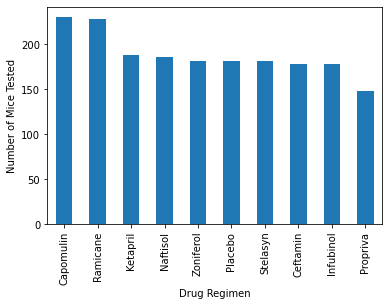

In [14]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen

datapoints = df.groupby("Drug Regimen")
chart_datapoints = datapoints["Mouse ID"].count().reset_index()
chart_datapoints = chart_datapoints.sort_values('Mouse ID', ascending=False)
chart_datapoints = chart_datapoints.set_index("Drug Regimen")
chart = chart_datapoints.plot(kind='bar', legend=None)
chart.set_ylabel("Number of Mice Tested")


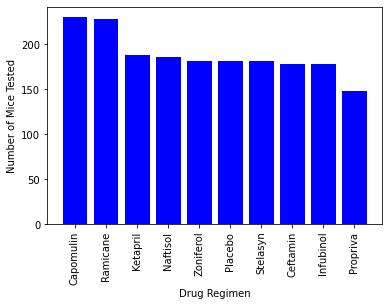

In [39]:
# Generate identical bar plot using pyplot instead of pandas.
chart_datapoints_reset = chart_datapoints.reset_index()
chart_datapoints_reset
x_axis = chart_datapoints_reset["Drug Regimen"]
y_axis = chart_datapoints_reset["Mouse ID"]

plt.bar(x_axis, y_axis, color="blue", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:ylabel='Sex'>

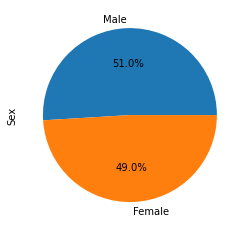

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = df.groupby(["Sex"]).count().sort_values('Mouse ID', ascending=False)
gender_group.plot.pie(y="Mouse ID", ylabel="Sex", autopct='%1.1f%%', startangle=0, legend=False)


Text(0, 0.5, 'Sex')

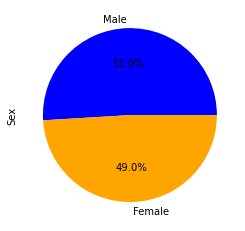

In [17]:
# Generate identical pie plot using pyplot
gender_group_df = gender_group["Mouse ID"]
gender_group_df=gender_group_df.reset_index()
gender_group_df=gender_group_df.rename(columns = {"Mouse ID": "Count"})
gender_group_df

colors=["blue", "orange"]

plt.pie(gender_group_df['Count'], labels=gender_group_df['Sex'], autopct='%1.1f%%', colors=colors)
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df.head(25)
tumor_volume = df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
timepoints_group = tumor_volume.groupby("Mouse ID")
max_timepoints = timepoints_group["Timepoint"].max()
max_timepoints.to_frame()
max_timepoints=max_timepoints.reset_index()
max_timepoints

tumor_volume = pd.merge(max_timepoints, tumor_volume, on=["Mouse ID", "Timepoint"])
tumor_volume


,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a262,45,Placebo,70.717621
3,a275,45,Ceftamin,62.999356
4,a366,30,Stelasyn,63.440686
...,...,...,...,...
243,z435,10,Propriva,48.710661
244,z578,45,Ramicane,30.638696
245,z581,45,Infubinol,62.754451
246,z795,45,Naftisol,65.741070


In [19]:
drugs = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin","Infubinol", "Propriva"]
drugs
select_drug_values = []
tumor_volume_sorted_df = tumor_volume.sort_values(by=["Drug Regimen", "Tumor Volume (mm3)"])
for drug in drugs:
    drug_df = tumor_volume_sorted_df.loc[tumor_volume_sorted_df['Drug Regimen']==drug]
    quartiles = drug_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"IQR for {drug} is {iqr}.")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    if drug == "Capomulin":
        select_drug_values.append(drug_df["Tumor Volume (mm3)"])
    if drug == "Ramicane":
        select_drug_values.append(drug_df["Tumor Volume (mm3)"])
    if drug == "Infubinol":
        select_drug_values.append(drug_df["Tumor Volume (mm3)"])
    if drug == "Ceftamin":
        select_drug_values.append(drug_df["Tumor Volume (mm3)"])

IQR for Capomulin is 7.781863460000004.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
IQR for Ramicane is 9.098536719999998.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
IQR for Ketapril is 13.152155339999993.
Values below 36.99186244000001 could be outliers.
Values above 89.60048379999998 could be outliers.
IQR for Naftisol is 17.484110670000007.
Values below 25.85334408499999 could be outliers.
Values above 95.78978676500002 could be outliers.
IQR for Zoniferol is 16.805853529999993.
Values below 24.77952216500001 could be outliers.
Values above 92.00293628499998 could be outliers.
IQR for Placebo is 15.191386480000006.
Values below 30.15582196999999 could be outliers.
Values above 90.92136789000001 could be outliers.
IQR for Stelasyn is 16.62734878500001.
Values below 27.53557243999998 could be outliers.
Values above 94.04496758000002 could be outliers.
IQR for Ceftamin is 15.5777521799

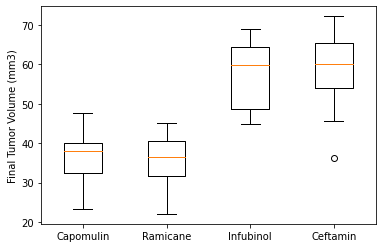

In [20]:


fig, ax = plt.subplots()
plt.boxplot(select_drug_values)


plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()




## Line and Scatter Plots

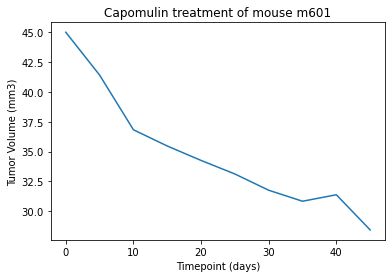

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
tumor_volume.loc[tumor_volume["Drug Regimen"]=="Capomulin"]
df.loc[df["Mouse ID"]=="m601"]
select_data = df.iloc[30:40]
timept=select_data["Timepoint"]
tumorvol=select_data["Tumor Volume (mm3)"]
x_axis = timept

plt.title("Capomulin treatment of mouse m601")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.plot(x_axis, tumorvol)
plt.show()






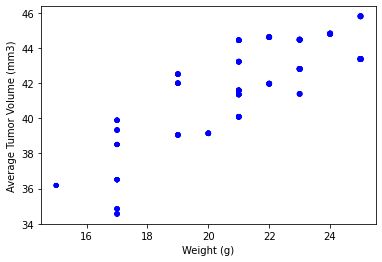

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
capomulin_mice=df.loc[df["Drug Regimen"]=="Capomulin"] 
capomulin_group_df = pd.DataFrame(df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())
capomulin_merge=pd.merge(capomulin_mice,capomulin_group_df, on="Mouse ID")
capomulin_merge = capomulin_merge.rename(columns={"Tumor Volume (mm3)_y":"Tumor Volume Average"})
x_axis = capomulin_merge["Weight (g)"]
y_axis = capomulin_merge["Tumor Volume Average"]
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", s=x_axis, 
           alpha=0.75)                                  
                                  

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


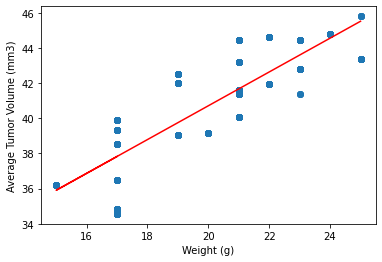

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x=capomulin_merge["Weight (g)"]
y=capomulin_merge["Tumor Volume Average"]
correlation = st.pearsonr(x,y)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)

regress_values = x * slope + intercept
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")


plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

# Observations and Insights